In [ ]:
import pandas as pd
data = pd.read_csv('data/@preprocessing_data_member01.csv')
data.head(7)

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문연도,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일
0,0,100304734@n,1.0,0.0,0.0,0.0,1.00,0.00,1,103300,...,2019.0,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday
1,1,1003409866@k,62.0,0.0,0.0,0.0,1.00,0.00,18,4303880,...,2019.0,5.0,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday
2,2,100381931@n,5.0,0.0,0.0,0.0,0.00,1.00,3,71050,...,2019.0,2.0,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday
3,3,1004498382@k,1.0,0.0,0.0,0.0,1.00,0.00,1,76400,...,2019.0,1.0,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
4,4,1004547839@k,4.0,1.0,0.0,0.0,0.00,0.00,1,360800,...,2019.0,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
5,5,1004714862@k,2.0,0.0,0.0,0.0,1.00,0.00,2,108110,...,2019.0,4.0,12.0,Friday,16.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
6,6,10055065@n,4.0,0.0,0.0,0.0,0.75,0.25,1,200480,...,2018.0,10.0,22.0,Monday,16.0,2018-10-22 00:00:00,2018.0,10.0,22.0,Monday


![image.png](attachment:image.png)

In [ ]:
# 7 - 1
pivot = pd.pivot_table(data = data, index = '최종주문요일', columns = '유입경로', values = '총구매횟수', aggfunc = 'sum')
pivot['총구매횟수(sum)'] = pivot.sum(axis = 1)
max_purchase_week = pivot.sort_values('총구매횟수(sum)', ascending = False).index[0]
max_inflow_media = pivot.loc[max_purchase_week,:].sort_values(ascending = False).index[1]
print(f'가장 많이 방문한 요일은 {max_purchase_week}이며 {max_inflow_media}로 가장 많이 방문했습니다.')


가장 많이 방문한 요일은 Wednesday이며 인터넷기사광고로 가장 많이 방문했습니다.


In [ ]:
# 7 - 2
data.groupby(['최종주문요일','유입경로'])[['총구매횟수']].sum().sort_values(by = ['최종주문요일','총구매횟수'],ascending = False)

총구매횟수
최종주문요일    유입경로          
Wednesday 인터넷기사광고    557
          이메일광고      514
          유튜브광고      479
          블로그광고      396
          전단지광고      388
...                  ...
Friday    인터넷검색      183
          블로그광고      165
          기타         158
          카카오톡광고     116
          신문광고        20

[83 rows x 1 columns]

![image.png](attachment:image.png)

In [ ]:
pd.pivot_table(data = data, index = '최종주문요일', values = '총판매액', aggfunc = 'mean').sort_values(by = '총판매액', ascending = False)

,총판매액
최종주문요일,
Thursday,701618.560440
Wednesday,677782.095238
Tuesday,615232.703863
Friday,579195.828804
Sunday,549632.510288
Monday,501610.190074
Saturday,431485.876777


In [ ]:
data.groupby('최종주문요일')[['총판매액']].mean().sort_values(by = '총판매액', ascending = False)

최종주문요일
Thursday     701618.560440
Wednesday    677782.095238
Tuesday      615232.703863
Friday       579195.828804
Sunday       549632.510288
Monday       501610.190074
Saturday     431485.876777
Name: 총판매액, dtype: float64

![image.png](attachment:image.png)

In [ ]:
# def change_am_pm(data):
#     result = data.replace('오전', 'AM').replace('오후', 'PM')
#     return result

In [ ]:
# data['최종주문일'].apply(change_am_pm)

In [ ]:
# 9 - 1
data['최종주문일(eng)'] = data['최종주문일'].apply(lambda x: x.replace('오전', 'AM').replace('오후', 'PM'))
data['최종주문일(eng)'] = pd.to_datetime(data['최종주문일(eng)'], format = '%Y-%m-%d %p %I:%M') # 2019-05-09 PM 2:12
data['최종주문일(date)'] = data['최종주문일(eng)'].dt.strftime('%Y-%m-%d')
data.groupby('최종주문일(date)')[['총구매횟수']].sum().sort_values(by = '총구매횟수', ascending = False)

,총구매횟수
최종주문일(date),
2019-05-29,1177
2019-05-30,1095
2019-05-28,1042
2019-05-27,879
2019-05-22,725
...,...
2018-01-12,1
2018-01-14,1
2018-01-17,1


In [ ]:
# 9 - 2
data.groupby(['최종주문연도','최종주문월','최종주문일자'])['총구매횟수'].sum().to_frame().sort_values(by = '총구매횟수')

총구매횟수
최종주문연도 최종주문월 최종주문일자       
2017.0 1.0   1.0         1
       12.0  29.0        1
             24.0        1
             17.0        1
             13.0        1
...                    ...
2019.0 5.0   22.0      725
             27.0      879
             28.0     1042
             30.0     1095
             29.0     1177

[629 rows x 1 columns]

# 시각화

## 그래프 그리기 기초

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

anscombe = sns.load_dataset('anscombe')
anscombe['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

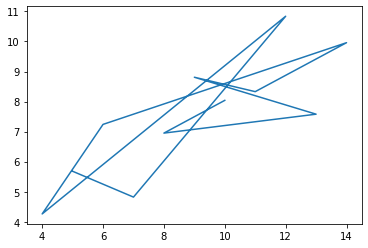

In [ ]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
plt.plot(dataset_1['x'], dataset_1['y'])

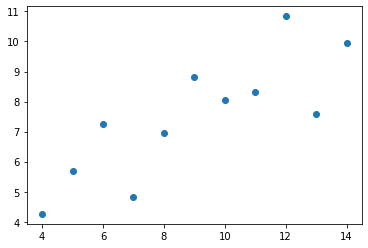

In [ ]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

In [ ]:
# 'I', 'II', 'III', 'IV'
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

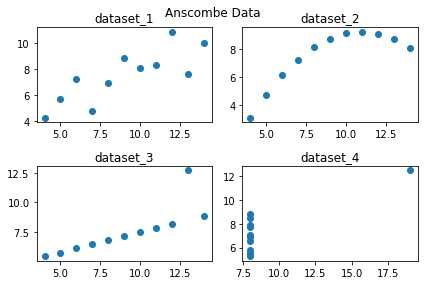

In [ ]:
# 틀(figure)을 만듭니다.
fig = plt.figure()

# 격자(axes)를 만듭니다.
axes1 = fig.add_subplot(2,2,1) # 2 x 2 사이즈의 axes를 만들고 그중에 1 번째
axes2 = fig.add_subplot(2,2,2) # 2 x 2 사이즈의 axes를 만들고 그중에 2 번째
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

# 그래프를 그립니다.
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

# 각 axes에 title 생성 
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

# figure title 생성
fig.suptitle('Anscombe Data')

# 레이아웃 다시 조정
fig.tight_layout()

## matplotlib

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'total bill')

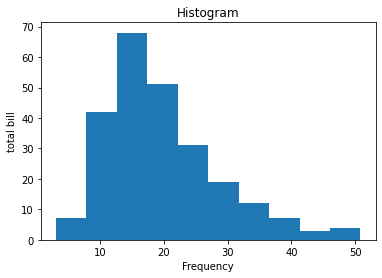

In [ ]:
fig = plt.figure()

axes1 = fig.add_subplot(1,1,1)

axes1.hist(tips['total_bill'], bins = 10)
axes1.set_title('Histogram')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('total bill')

Text(0, 0.5, 'tip')

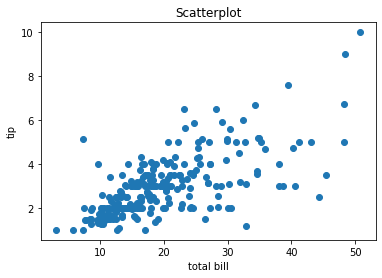

In [ ]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot')
axes1.set_xlabel('total bill')
axes1.set_ylabel('tip')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Tip')

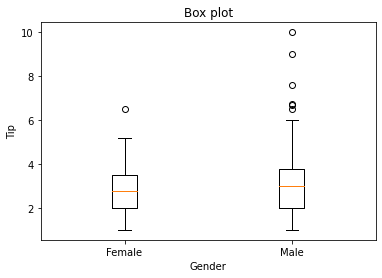

In [ ]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot(
    [tips[tips['sex'] == 'Female']['tip'],
     tips[tips['sex'] == 'Male']['tip']
     ],
     labels = ['Female', 'Male']
)
axes1.set_title('Box plot')
axes1.set_xlabel('Gender')
axes1.set_ylabel('Tip')

In [ ]:
def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 1

In [ ]:
tips['sex_color'] = tips['sex'].apply(recode_sex)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


Text(0, 0.5, 'tip')

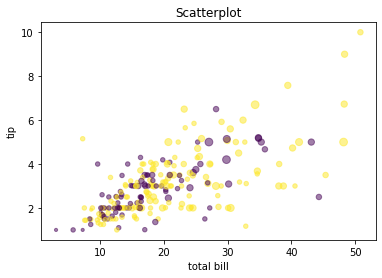

In [ ]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x = tips['total_bill'], 
    y = tips['tip'],
    s = tips['size'] * 10,
    c = tips['sex_color'],
    alpha = 0.5)

axes1.set_title('Scatterplot')
axes1.set_xlabel('total bill')
axes1.set_ylabel('tip')

## seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Plot')

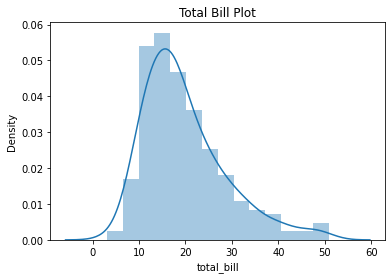

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
ax = plt.subplot()

x = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Plot')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Average total bill')

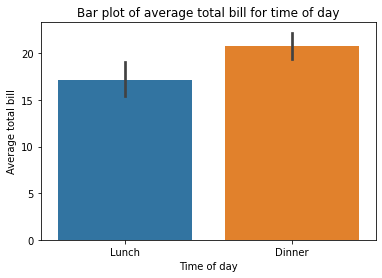

In [ ]:
ax = plt.subplot()
sns.barplot(data = tips, x = 'time', y = 'total_bill')
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

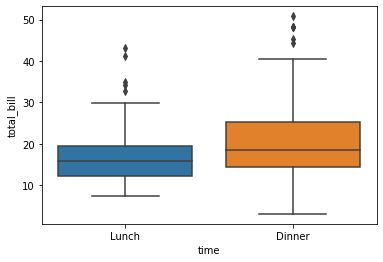

In [ ]:
sns.boxplot(data = tips,x = 'time', y = 'total_bill')

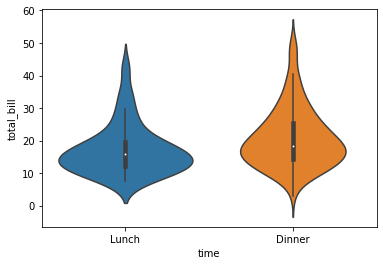

In [ ]:
sns.violinplot(data = tips,x = 'time', y = 'total_bill')

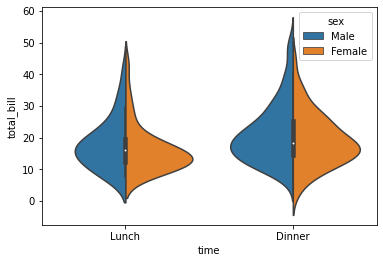

In [ ]:
sns.violinplot(data = tips,x = 'time', y = 'total_bill', hue = 'sex', split = True)

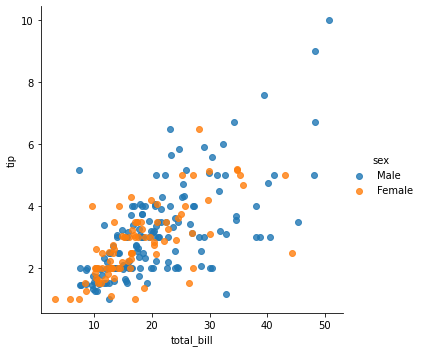

In [ ]:
sns.lmplot(data = tips,x = 'total_bill', y = 'tip', hue = 'sex', fit_reg= False)

## 실습

In [ ]:
import pandas as pd
import seaborn as sns

mpg = pd.read_csv('data/mpg.csv')

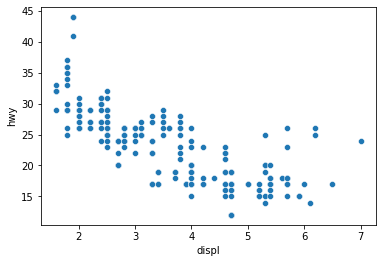

In [ ]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(10.0, 30.0), (3.0, 6.0)]

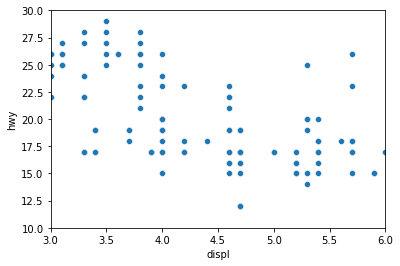

In [ ]:
# x축 범위, y축 범위 수정하기
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy').set(xlim = (3,6), ylim = (10,30))

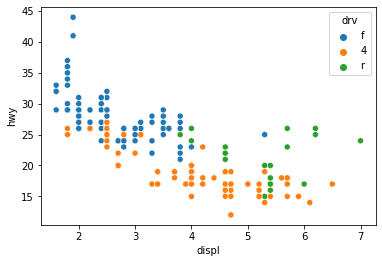

In [ ]:
# scatterplot에서 hue 활용하기
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

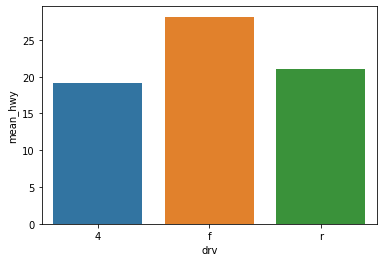

In [ ]:
# barplot 그리기
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean')) # as_index : groupby 할 때 index를 밖으로
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

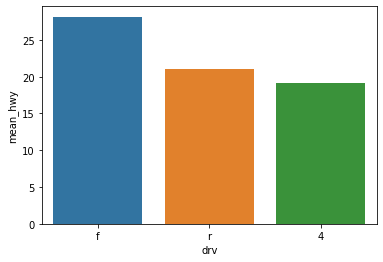

In [ ]:
# barplot 정렬해서 그리기
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

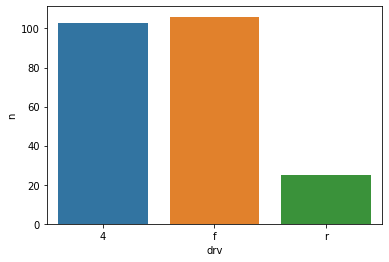

In [ ]:
# barplot으로 count plot 그리기
df_mpg = mpg.groupby('drv', as_index = False).agg(n = ('drv', 'count')) # as_index : groupby 할 때 index를 밖으로
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

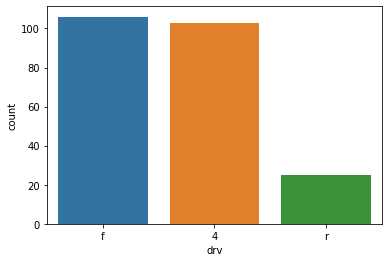

In [ ]:
# count plot
sns.countplot(data = mpg, x = 'drv')

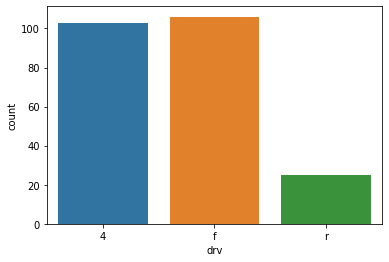

In [ ]:
# 정렬 기준을 명시
sns.countplot(data = mpg, x = 'drv', order = ['4','f','r'])

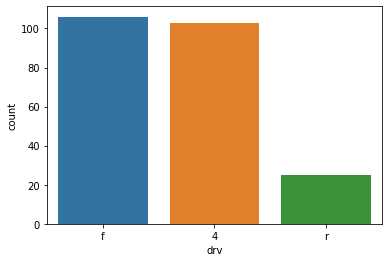

In [ ]:
# 많은 순으로 정렬
sns.countplot(data = mpg, x = 'drv', order = mpg['drv'].value_counts().index)

### Practice

#### mpg 데이터의 cty와 hwy 를 활용한 scatter chart를 그리고 관계를 판단해보세요.


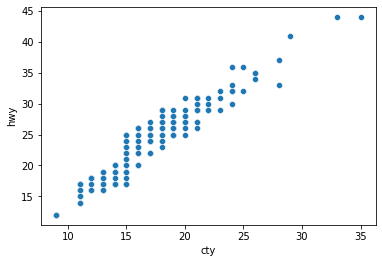

In [ ]:
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy')

#### ‘suv’차종을 대상으로 cty 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현해보세요.


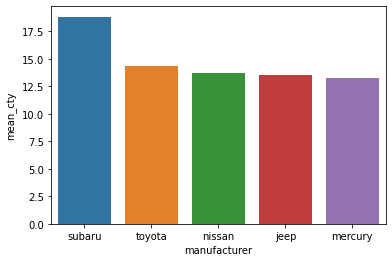

In [ ]:
suv = mpg[mpg['category'] == 'suv']
grouped_manufacturer = suv.groupby('manufacturer', as_index = False).agg(mean_cty = ('cty', 'mean'))
TOP5_suv = grouped_manufacturer.sort_values(by = 'mean_cty', ascending = False).head()
sns.barplot(data = TOP5_suv, x = 'manufacturer', y = 'mean_cty')

#### 어떤 category가 많은지 barplot을 이용해 그래프를 그리고 빈도가 높은 순으로 정렬하세요.

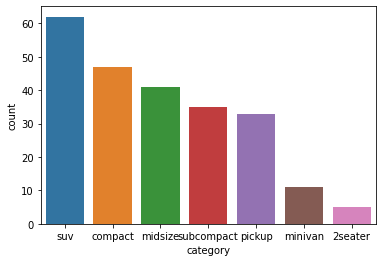

In [ ]:
grouped_category = mpg.groupby('category', as_index = False)\
  .agg(count = ('manufacturer', 'count'))\
  .sort_values(by = 'count', ascending = False)
sns.barplot(data = grouped_category, x = 'category', y = 'count')

In [ ]:
mpg.groupby('year').agg(평균_도심연비 = ('cty', 'mean'), 
                        mean_hwy = ('hwy', 'mean'))

,평균_도심연비,mean_hwy
year,,
1999,17.017094,23.427350
2008,16.700855,23.452991


In [ ]:
economics = pd.read_csv('data/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


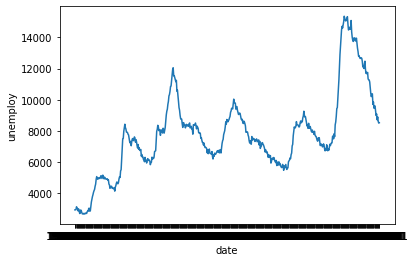

In [ ]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [ ]:
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


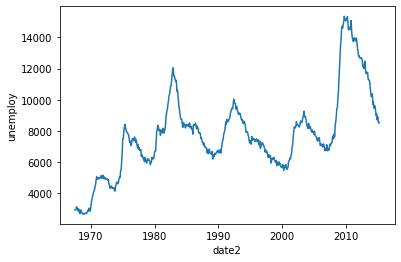

In [ ]:
sns.lineplot(data = economics, x = 'date2', y = 'unemploy')

In [ ]:
economics['year'] = economics['date2'].dt.year
economics['month'] = economics['date2'].dt.month
economics['day'] = economics['date2'].dt.day
economics

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month,day
0,1967-07-01,506.7,198712.000,12.6,4.5,2944,1967-07-01,1967,7,1
1,1967-08-01,509.8,198911.000,12.6,4.7,2945,1967-08-01,1967,8,1
2,1967-09-01,515.6,199113.000,11.9,4.6,2958,1967-09-01,1967,9,1
3,1967-10-01,512.2,199311.000,12.9,4.9,3143,1967-10-01,1967,10,1
4,1967-11-01,517.4,199498.000,12.8,4.7,3066,1967-11-01,1967,11,1
...,...,...,...,...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717,2014-12-01,2014,12,1
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903,2015-01-01,2015,1,1
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610,2015-02-01,2015,2,1
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504,2015-03-01,2015,3,1


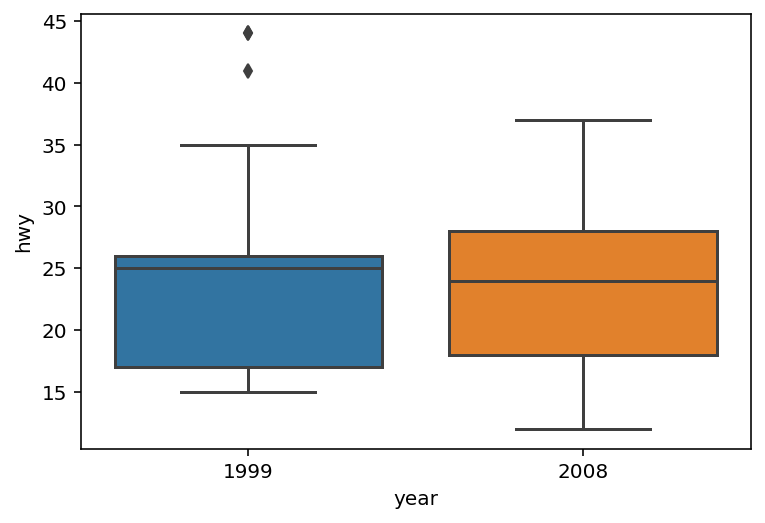

In [ ]:
sns.boxplot(data = mpg, x = 'year', y = 'hwy')

### 연습문제

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
import platform

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [ ]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('data/@preprocessing_data_member01.csv')
data.head(7)

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문연도,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일
0,0,100304734@n,1.0,0.0,0.0,0.0,1.00,0.00,1,103300,...,2019.0,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday
1,1,1003409866@k,62.0,0.0,0.0,0.0,1.00,0.00,18,4303880,...,2019.0,5.0,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday
2,2,100381931@n,5.0,0.0,0.0,0.0,0.00,1.00,3,71050,...,2019.0,2.0,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday
3,3,1004498382@k,1.0,0.0,0.0,0.0,1.00,0.00,1,76400,...,2019.0,1.0,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
4,4,1004547839@k,4.0,1.0,0.0,0.0,0.00,0.00,1,360800,...,2019.0,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
5,5,1004714862@k,2.0,0.0,0.0,0.0,1.00,0.00,2,108110,...,2019.0,4.0,12.0,Friday,16.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
6,6,10055065@n,4.0,0.0,0.0,0.0,0.75,0.25,1,200480,...,2018.0,10.0,22.0,Monday,16.0,2018-10-22 00:00:00,2018.0,10.0,22.0,Monday


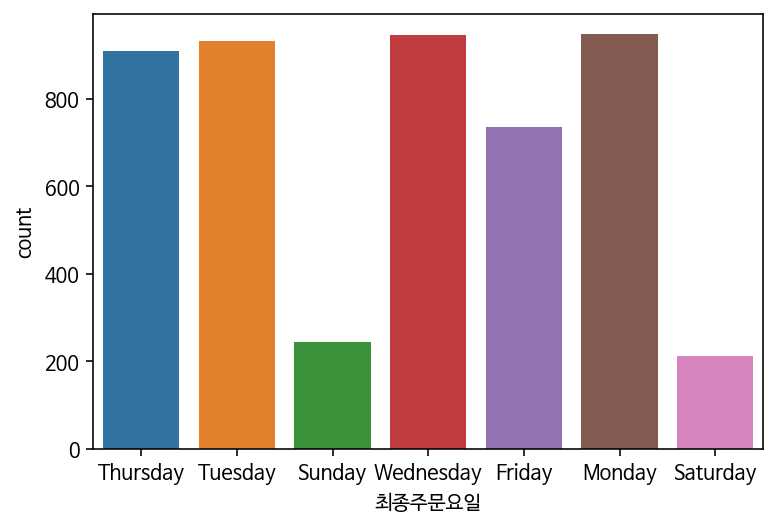

In [ ]:
# 1
sns.countplot(data = data, x='최종주문요일') 

In [ ]:
# 2 - 1
def recode_age(data):
  if data < 30:
    return '20대'
  elif data < 40:
    return '30대'
  elif data < 50:
    return '40대'
  else:
    return '50대이상'

In [ ]:
data['연령대'] = data['나이'].apply(recode_age)

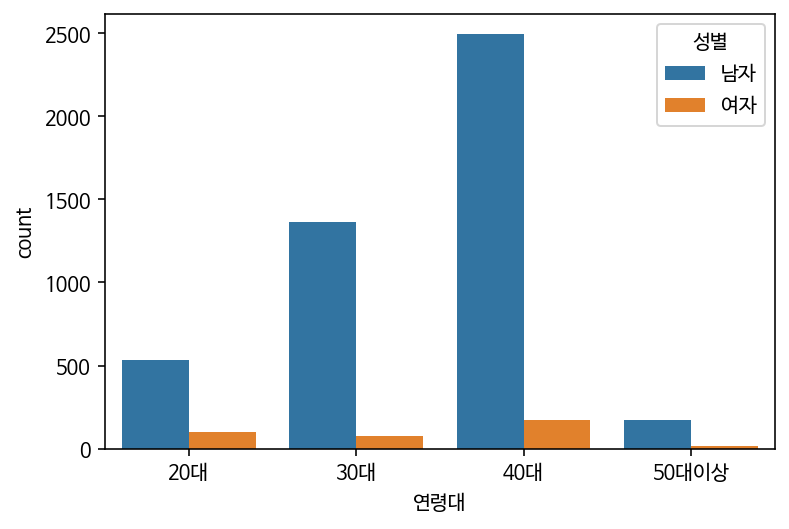

In [ ]:
sns.countplot(data = data.sort_values(by = '연령대'), x='연령대', hue = '성별') 

In [ ]:
# 2-2
data['연령대'] = (data['나이'] // 10)*10 
dt = data.astype({'연령대':'int'}) 
sns.countplot(data=dt , x = '연령대', hue = '성별')

0       40.0
1       20.0
2       40.0
3       40.0
4       40.0
        ... 
4919    40.0
4920    30.0
4921    40.0
4922    40.0
4923    40.0
Name: 나이, Length: 4924, dtype: float64

In [ ]:
# 2-3
data['연령대'] = data['나이']/10
data['연령대'] = round(data['연령대'],0)*10

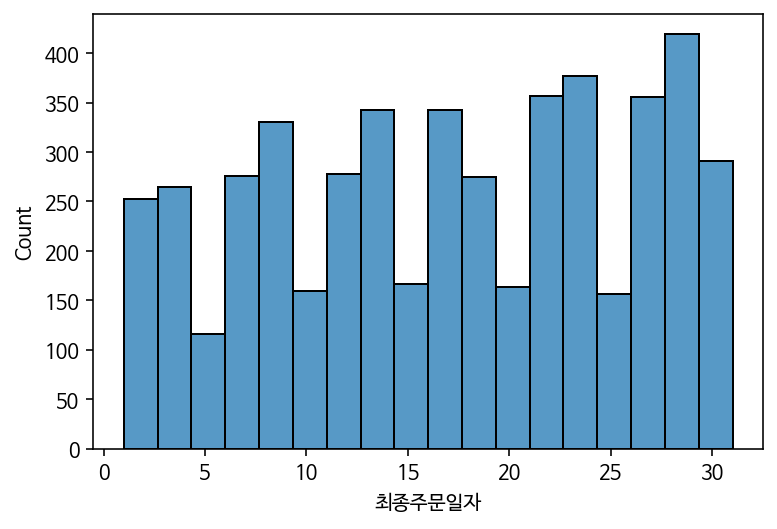

In [ ]:
# 3
sns.histplot(data=data, x="최종주문일자")

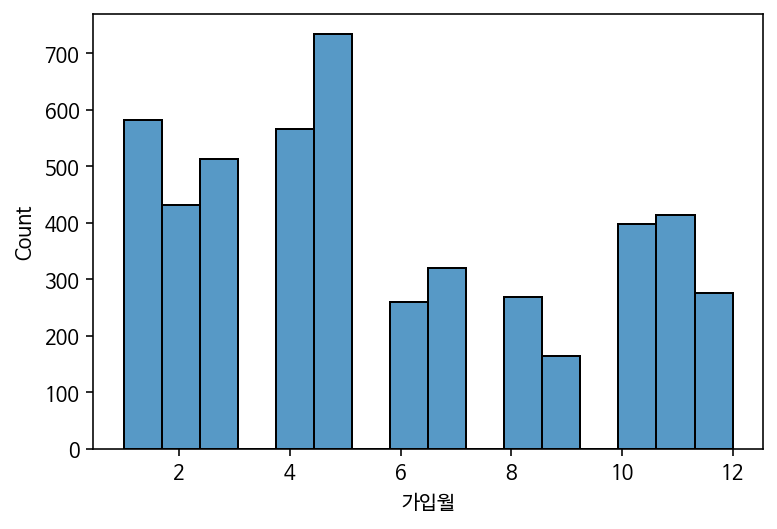

In [ ]:
# 3
sns.histplot(data=data, x="가입월")

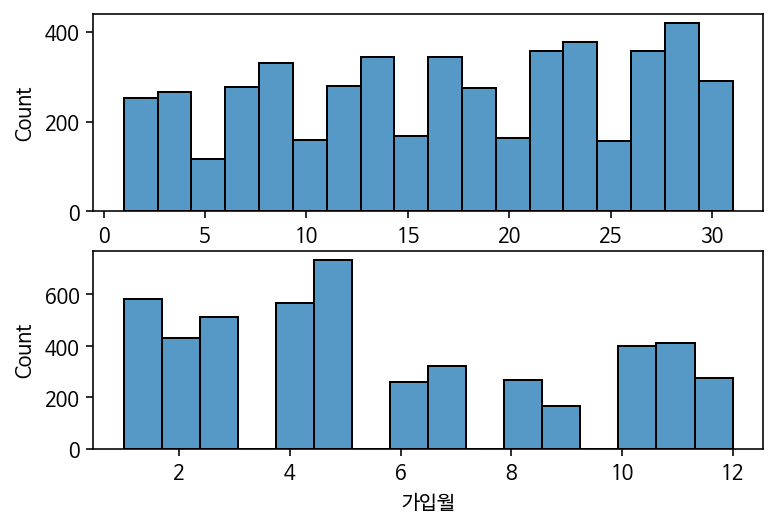

In [ ]:
# 3-2
# 틀(figure)을 만듭니다.
fig = plt.figure()

# 격자(axes)를 만듭니다.
axes1 = fig.add_subplot(2,1,1) # 2 x 2 사이즈의 axes를 만들고 그중에 1 번째
axes2 = fig.add_subplot(2,1,2) # 2 x 2 사이즈의 axes를 만들고 그중에 2 번째

sns.histplot(data=data, x="최종주문일자", ax = axes1)
sns.histplot(data=data, x="가입월", ax = axes2)

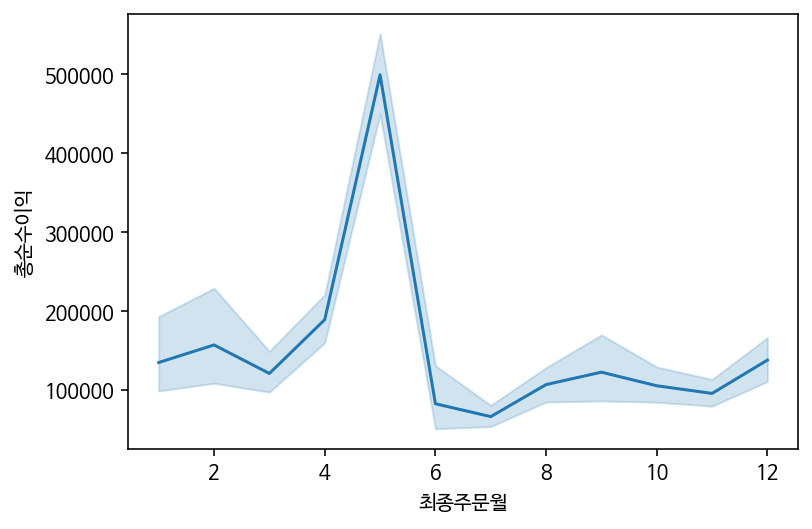

In [ ]:
# 4 
sns.lineplot(data = data, x = '최종주문월', y = '총순수이익')

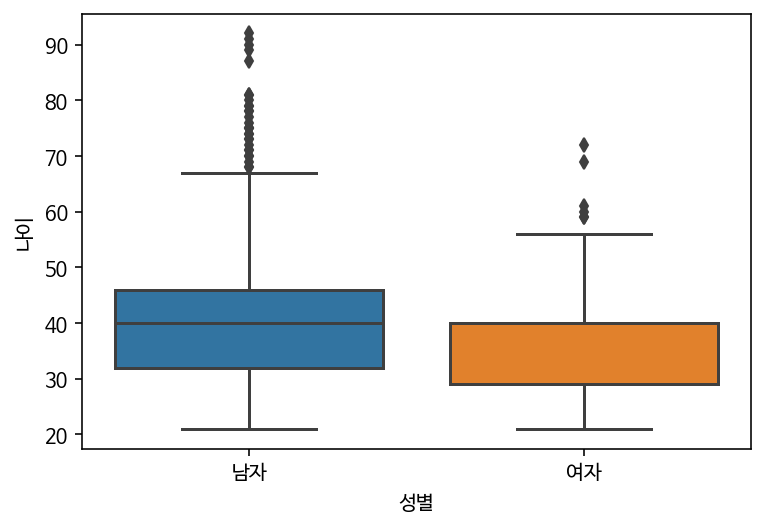

In [ ]:
# 5
sns.boxplot(data = data, x = '성별', y = '나이')

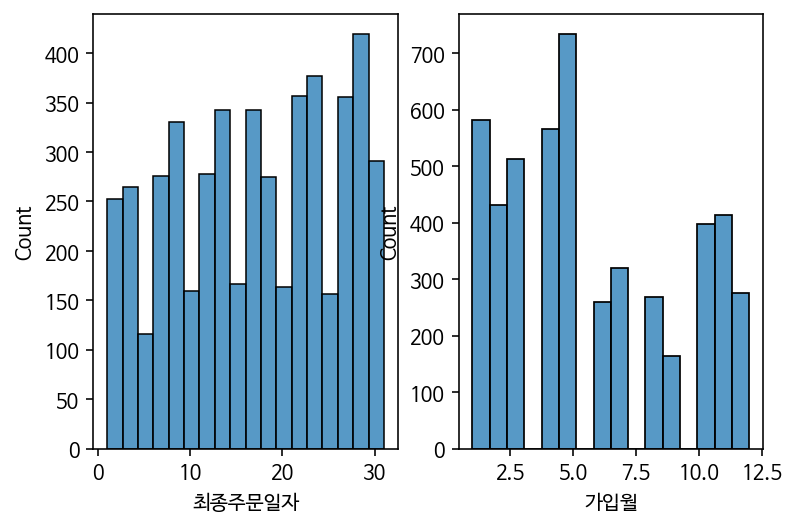

In [ ]:
#3번
fig = plt.figure()

#격자(axes)를 만든다.
axes1 = fig.add_subplot(1,2,1)
axes2 = fig.add_subplot(1,2,2)

sns.histplot(data['최종주문일자'],ax=axes1)
sns.histplot(data['가입월'] ,ax=axes2)

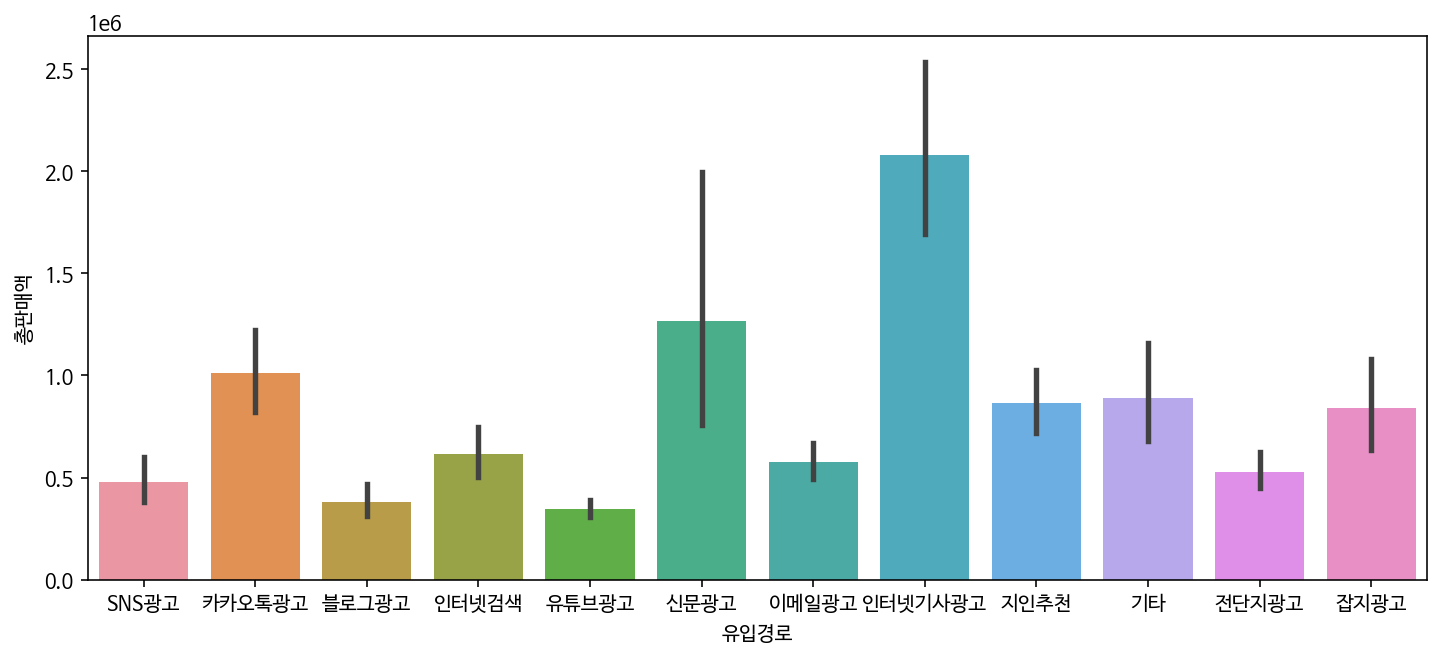

In [ ]:
# 6
plt.figure(figsize = (12, 5))
sns.barplot(data = data, x = '유입경로', y = '총판매액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

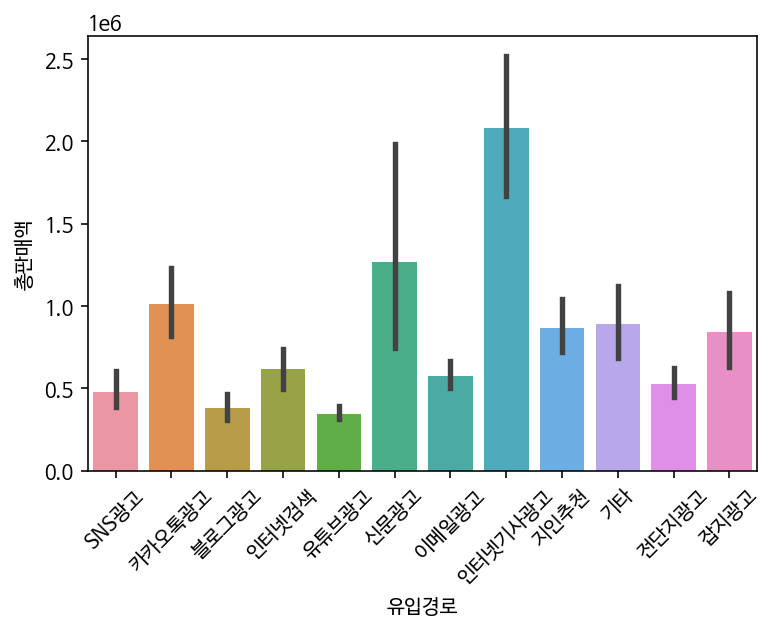

In [ ]:
sns.barplot(data = data, x = '유입경로', y = '총판매액')
plt.xticks(rotation = 45 ) 

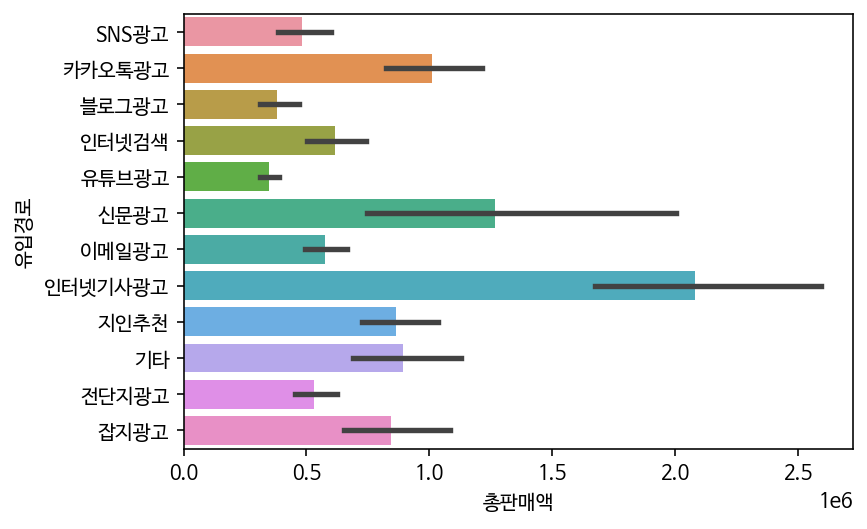

In [ ]:
sns.barplot(data = data, y = '유입경로', x = '총판매액')

In [ ]:
# 7
def extract_adress(text):
    adress_list = text.split(' ')[:2]
    adress = ' '.join(adress_list)
    return adress

In [ ]:
data['주소(시,도)'] = data['주소'].apply(extract_adress)

In [ ]:
data.groupby('주소(시,도)').sum()[['총판매액']]